In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
data = pd.read_csv('datasets/HousingData.csv')

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
data.shape

(506, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
 data = data.drop(['CRIM','ZN', 'B'], axis=1)

In [12]:
data.head()

,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [13]:
data.describe()

,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,12.715432,22.532806
std,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,7.155871,9.197104
min,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,7.125000,17.025000
50%,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,11.430000,21.200000
75%,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [28]:
data.isnull().sum()

INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [29]:
data = data.dropna(subset=['INDUS', 'CHAS', 'AGE','LSTAT'])

Text(1.6749999999999972, 0.5, 'Median value for owner occupied home')

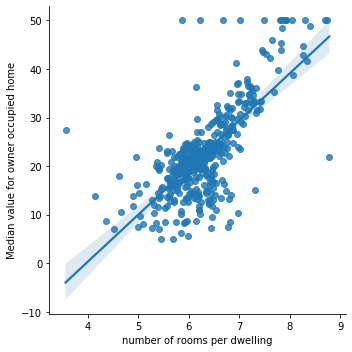

In [30]:
sns.lmplot('RM', 'MEDV', data)

plt.xlabel("number of rooms per dwelling")
plt.ylabel("Median value for owner occupied home")

Text(10.049999999999997, 0.5, 'Median value for owner occupied home')

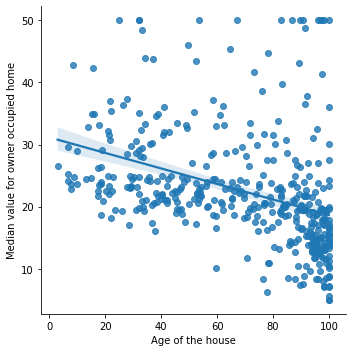

In [31]:
sns.lmplot('AGE', 'MEDV', data)

plt.xlabel("Age of the house")
plt.ylabel("Median value for owner occupied home")

Text(10.049999999999997, 0.5, 'Median value for owner occupied home')

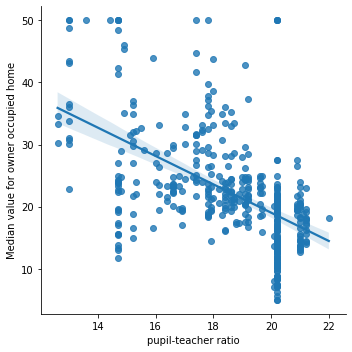

In [32]:
sns.lmplot('PTRATIO', 'MEDV', data)

plt.xlabel("pupil-teacher ratio")
plt.ylabel("Median value for owner occupied home")

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [34]:
x = data.drop('MEDV', axis=1)
y=data['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [35]:
x_test.shape, y_test.shape

((86, 10), (86,))

In [36]:
x_train.shape, y_train.shape

((343, 10), (343,))

In [37]:
linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred = linear_regression.predict(x_test)

y_pred

array([27.23093128, 31.77065037, 22.79183307, 20.38019203, 19.57588254,
       18.05616395, 11.71112978, 23.30991063, 20.28207637, 35.91894897,
       13.91561681, 23.45848181, 32.13859917, 33.70824596, 19.76586596,
       31.91836142, 24.81385998, 24.73937368, 32.74865126, 35.2177237 ,
       31.56394933, 19.77788471, 20.61984005, 25.8868442 , 24.06988407,
       30.06245563, 20.37515536, 32.47878049, 17.55114726, 20.85497962,
       18.48158006, 14.52134637, 39.49965151, 12.03059664, 24.95333429,
       30.47944113, 33.78694593, 15.4848198 , 20.61670233, 24.61328776,
       27.55587178,  8.91805497, 15.91986691, 33.28956892, 17.97846794,
       20.31710826, 21.45192716, -1.77531883, 25.16297748, 16.27377486,
        3.27937984, 17.13092863, 12.06579664, 14.37261204, 18.93987812,
       31.33817965, 33.38204498,  6.42159637, 11.8380449 , 23.06965048,
       34.14012915, 17.9371796 , 25.56059638, 15.09785769, 20.73534888,
       23.63210449, 35.24855153, 35.0882593 , 29.46560394, 27.80

In [39]:
df_y = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

df_y.sample(10)

,y_test,y_pred
375,15.0,24.739374
424,11.7,15.919867
320,23.8,25.162977
200,32.9,29.465604
224,44.8,38.978243
5,28.7,26.182577
500,16.8,19.777885
489,7.0,8.918055
373,13.8,3.279380
1,21.6,25.886844


In [40]:
print('Training Score: ', linear_regression.score(x_train, y_train))

Training Score:  0.7569652840977037


In [42]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print("Testing Score: ", score)

Testing Score:  0.6777758536004577


In [43]:
import numpy as np
import statsmodels.api as sm


In [45]:
x = np.array(x)

x[:5]

array([[  2.31  ,   0.    ,   0.538 ,   6.575 ,  65.2   ,   4.09  ,
          1.    , 296.    ,  15.3   ,   4.98  ],
       [  7.07  ,   0.    ,   0.469 ,   6.421 ,  78.9   ,   4.9671,
          2.    , 242.    ,  17.8   ,   9.14  ],
       [  7.07  ,   0.    ,   0.469 ,   7.185 ,  61.1   ,   4.9671,
          2.    , 242.    ,  17.8   ,   4.03  ],
       [  2.18  ,   0.    ,   0.458 ,   6.998 ,  45.8   ,   6.0622,
          3.    , 222.    ,  18.7   ,   2.94  ],
       [  2.18  ,   0.    ,   0.458 ,   6.43  ,  58.7   ,   6.0622,
          3.    , 222.    ,  18.7   ,   5.21  ]])

In [47]:
x = sm.add_constant(x)

x[:5]

array([[  1.    ,   2.31  ,   0.    ,   0.538 ,   6.575 ,  65.2   ,
          4.09  ,   1.    , 296.    ,  15.3   ,   4.98  ],
       [  1.    ,   7.07  ,   0.    ,   0.469 ,   6.421 ,  78.9   ,
          4.9671,   2.    , 242.    ,  17.8   ,   9.14  ],
       [  1.    ,   7.07  ,   0.    ,   0.469 ,   7.185 ,  61.1   ,
          4.9671,   2.    , 242.    ,  17.8   ,   4.03  ],
       [  1.    ,   2.18  ,   0.    ,   0.458 ,   6.998 ,  45.8   ,
          6.0622,   3.    , 222.    ,  18.7   ,   2.94  ],
       [  1.    ,   2.18  ,   0.    ,   0.458 ,   6.43  ,  58.7   ,
          6.0622,   3.    , 222.    ,  18.7   ,   5.21  ]])

In [51]:
model  = sm.OLS(y,x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     120.1
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          2.97e-116
Time:                        16:49:22   Log-Likelihood:                -1273.7
No. Observations:                 429   AIC:                             2569.
Df Residuals:                     418   BIC:                             2614.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.6906      5.519      6.648      0.000      25.843      47.538
x1            -0.0077      0.067     -0.114      0.910      -0.140       0.125
x2             3.6929      0.927      3.984      0.000       1.871       5.515
x3           -18.3520      4.298     -4.270      0.000     -26.800      -9.904
x4             4.5019      0.472      9.533      0.000       3.574       5.430
x5            -0.0094      0.015     -0.647      0.518      -0.038       0.019
x6            -1.1901      0.201     -5.913      0.000      -1.586      -0.794
x7             0.1658      0.068      2.430      0.016       0.032       0.300
x8            -0.0098      0.004     -2.488      0.013      -0.018      -0.002
x9            -1.0100      0.134     -7.526      0.000      -1.274      -0.746
x10           -0.4980      0.055     -9.064      0.000      -0.606      -0.390
==============================================================================
Omnibus:                      146.323   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              641.203
Skew:                           1.443   Prob(JB):                    5.81e-140
Kurtosis:                       8.248   Cond. No.                     1.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""